<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_04/EDA/Part_A_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04: Apache Beam Data Engineering Assignment
### Part A: Exploratory Data Analysis
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.


Tasks:
1. Pick a complex dataset from kaggle
2. Demonstrate advanced d3.js visualizations

Sources:
[cssbook](https://cssbook.net/chapter07.html)  
[Kaggle - Andrada GrandMaster](https://www.kaggle.com/andradaolteanu)  
[Kaggle - Andrada Notebooks](https://www.kaggle.com/andradaolteanu/code)   
[Data Analysis & Visualization in Python](https://python.plainenglish.io/unicorn-startups-data-analysis-and-visualization-377224424a6a
)   


Dataset Link:
[Childcare Costs](https://www.kaggle.com/datasets/sujaykapadnis/childcare-costs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Load the datasets
childcare_costs = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/childcare_costs.csv')
counties = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/counties.csv')

In [ ]:
# Display the first few rows of each dataset for a preliminary understanding
childcare_costs_head = childcare_costs.head()

In [ ]:
counties_head = counties.head()


In [ ]:
# Get info on the datasets
childcare_costs_info = childcare_costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county_fips_code           34567 non-null  int64  
 1   study_year                 34567 non-null  int64  
 2   unr_16                     34567 non-null  float64
 3   funr_16                    34567 non-null  float64
 4   munr_16                    34567 non-null  float64
 5   unr_20to64                 34567 non-null  float64
 6   funr_20to64                34567 non-null  float64
 7   munr_20to64                34567 non-null  float64
 8   flfpr_20to64               34567 non-null  float64
 9   flfpr_20to64_under6        34567 non-null  float64
 10  flfpr_20to64_6to17         34567 non-null  float64
 11  flfpr_20to64_under6_6to17  34567 non-null  float64
 12  mlfpr_20to64               34567 non-null  float64
 13  pr_f                       34567 non-null  flo

In [ ]:
counties_info = counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_fips_code    3144 non-null   int64 
 1   county_name         3144 non-null   object
 2   state_name          3144 non-null   object
 3   state_abbreviation  3144 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.4+ KB


In [ ]:
(childcare_costs_head, counties_head), (childcare_costs_info, counties_info)

((   county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
  0              1001        2008    5.42     4.41     6.32         4.6   
  1              1001        2009    5.93     5.72     6.11         4.8   
  2              1001        2010    6.21     5.57     6.78         5.1   
  3              1001        2011    7.55     8.13     7.03         6.2   
  4              1001        2012    8.60     8.88     8.29         6.7   
  
     funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  memp_p  \
  0          3.5          5.6          68.9                 66.9  ...   21.55   
  1          4.6          5.0          70.8                 63.7  ...   21.96   
  2          4.6          5.6          71.3                 67.0  ...   21.28   
  3          6.3          6.1          70.2                 66.5  ...   22.80   
  4          6.4          7.0          70.6                 67.1  ...   22.88   
  
     femp_p   mcsa  mfccsa  mc_infant  mc_toddler  mc_pres

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizations

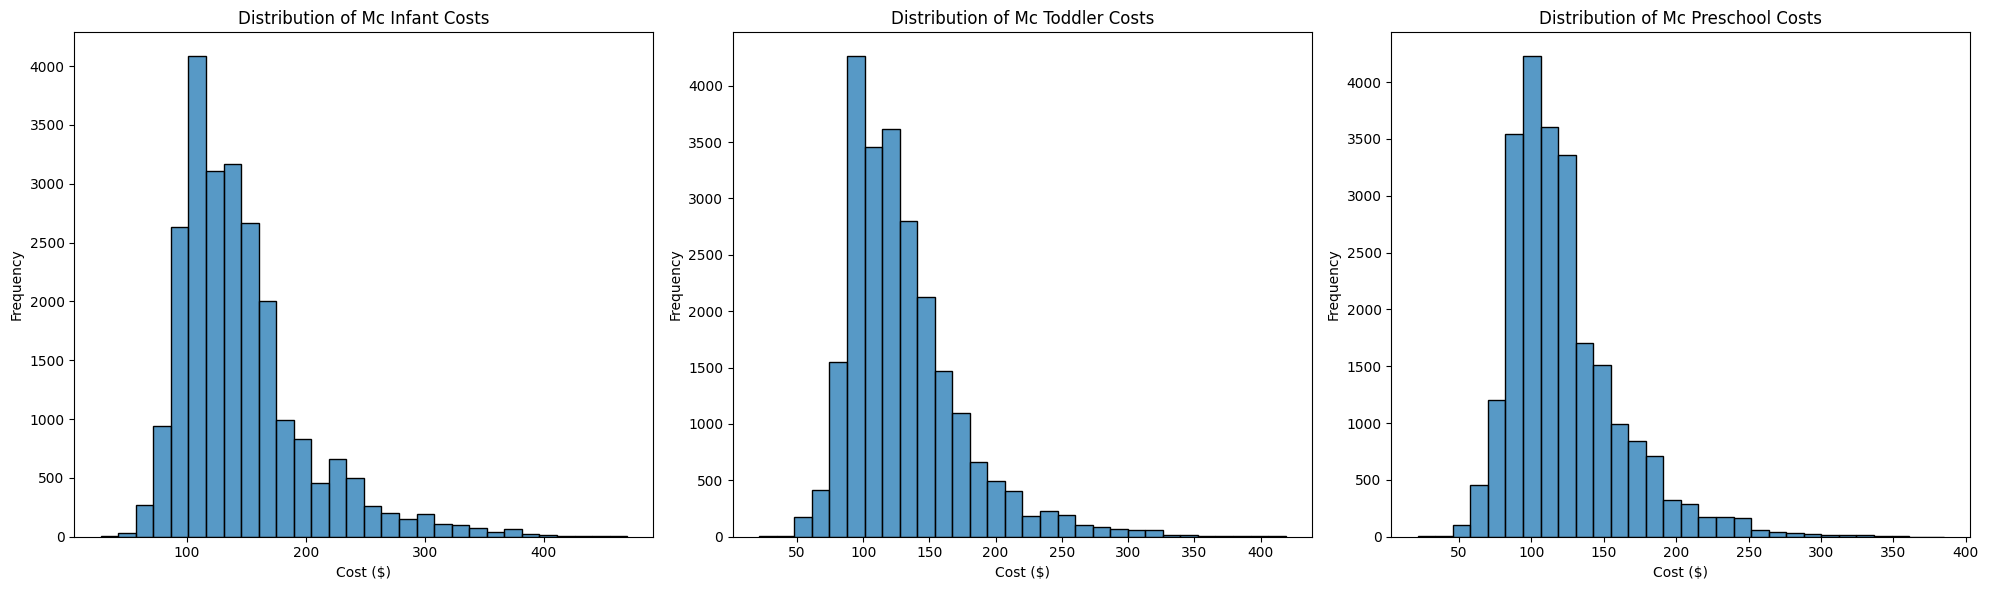

In [ ]:
# Selecting relevant columns for the initial visualizations
childcare_columns = ['mc_infant', 'mc_toddler', 'mc_preschool', 'mhi_2018']
childcare_costs_subset = childcare_costs[childcare_columns]

# Visualization 1: Histograms of childcare costs for different age groups
plt.figure(figsize=(20, 6))

for i, column in enumerate(['mc_infant', 'mc_toddler', 'mc_preschool'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(childcare_costs_subset[column], kde=False, bins=30)
    plt.title(f'Distribution of {column.replace("_", " ").title()} Costs')
    plt.xlabel('Cost ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Childcare Costs: The histograms show the distribution of childcare costs for infants, toddlers, and preschoolers. We observe that for all age groups, the costs are skewed towards the lower end, indicating that most counties report lower average childcare costs. However, there are still a significant number of counties with higher costs, as shown by the long tail of the distributions.

<ipython-input-11-cd65ad8b7722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_costs_subset['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)


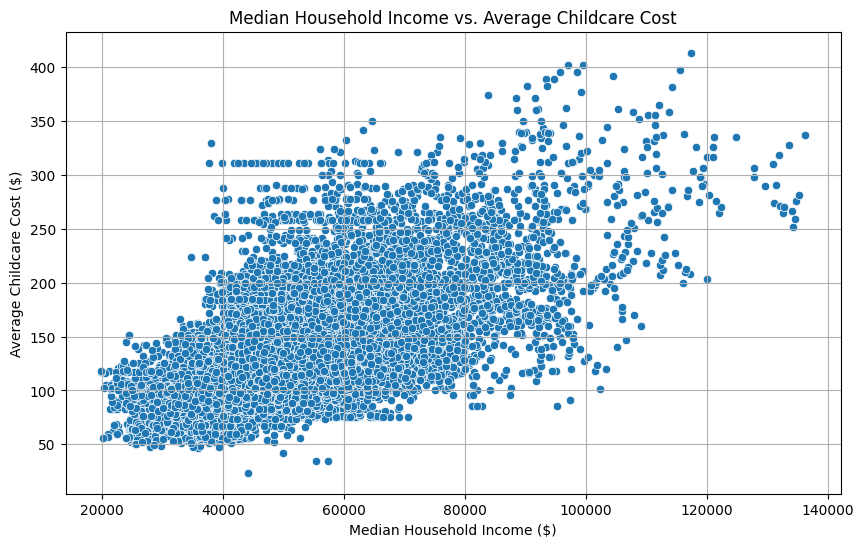

In [ ]:
# Visualization 2: Scatter plot of median household income vs. average childcare cost
# For simplicity, we take an average of the childcare costs across different age groups.
childcare_costs_subset['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mhi_2018', y='average_childcare_cost', data=childcare_costs_subset)
plt.title('Median Household Income vs. Average Childcare Cost')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Average Childcare Cost ($)')
plt.grid(True)
plt.show()

Median Household Income vs. Average Childcare Cost: The scatter plot indicates a trend where counties with higher median household incomes tend to have higher average childcare costs. This trend suggests that in areas where families earn more, childcare providers might charge more, possibly due to higher living costs or greater demand for premium services.

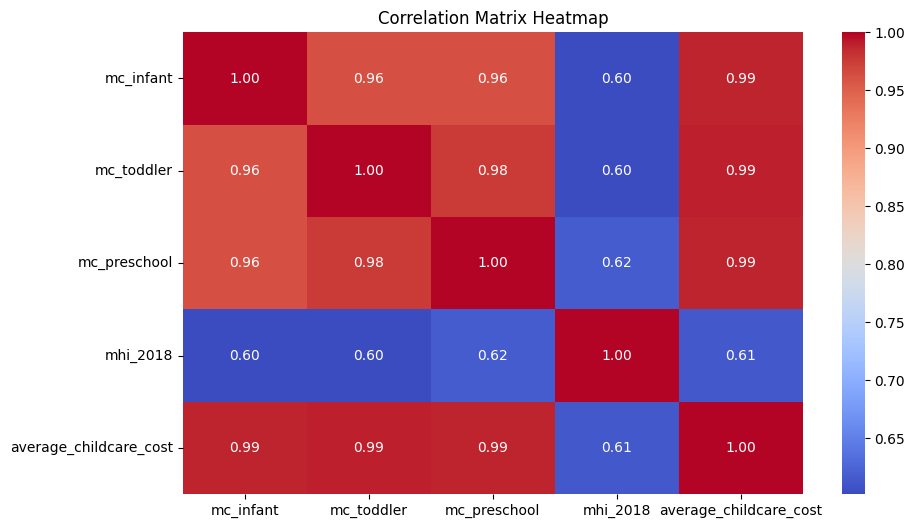

In [ ]:
# Visualization 3: Heatmap of the correlation matrix
correlation_matrix = childcare_costs_subset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Correlation Matrix Heatmap: The heatmap shows the correlation coefficients between different variables. Notably, there is a positive correlation between median household income ('mhi_2018') and the childcare costs for different age groups, confirming the trend observed in the scatter plot. The childcare costs for infants, toddlers, and preschoolers are also highly correlated with each other, suggesting that the factors affecting the cost of childcare are consistent across different age groups.

#### Insights Gained
It seems that childcare costs for infants and toddlers is higher than the average childcare cost.